# Singular Value Decomposition and Low-rank approximations

We have learned in the lecture videos how the singular value decomposition can be used to identify the "most important" information in a matrix by choosing the "best" low-rank approximation. We will now explore this in more depth.

In [11]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

## Singular Value Decomposition
The singular value decomposition allow us to decompose any matrix $A$ of size $m \times n$ as
$$A = U\Sigma V^T$$
where
1. $U$ is orthogonal of size $m\times m$.
1. $\Sigma$ is diagonal of size $m\times n$.
1. $V^T$ is orthogonal of size $n\times n$.

The diagonal entries of $\Sigma$ are called the **singular values**, these are ordered from greatest to least, top left to bottom right.

The columns of $U$ are called **left singular vectors**, the columns of $V$ are called **right singular vectors**.

### Visualising the singular value decomposition

Since $U$ and $V$ are both orthogonal, they can be interpreted as rotation matrices (and can be with or without reflection), while $\Sigma$ is a scaling matrix. Also note that when $\Sigma$ is non-square, it leads to elimination of certain components or to the addition of zero components. Let's now visualise this for the matrix
$$ A = \begin{bmatrix} 1.0 & -0.8 \\ 0.02 & 1.0 \\ 1.0 & 0.002 \end{bmatrix}$$
First, we compute the singular value decomposition:

In [7]:
A = np.array([[1., -0.8],[0.02, 1.],[1.,0.002]])
U,Svec,VT = npl.svd(A)

# Convert the vector of singular values to a matrix Sigma
S = np.zeros(A.shape)
np.fill_diagonal(S,Svec)

In [8]:
(U, S, VT, U@S@VT)

(array([[-0.79135033,  0.00398419, -0.61134996],
        [ 0.37483231, -0.78681942, -0.49032228],
        [-0.48297556, -0.61717042,  0.62115641]]),
 array([[1.61827002, 0.        ],
        [0.        , 1.01074535],
        [0.        , 0.        ]]),
 array([[-0.78282934,  0.62223647],
        [-0.62223647, -0.78282934]]),
 array([[ 1.   , -0.8  ],
        [ 0.02 ,  1.   ],
        [ 1.   ,  0.002]]))

Now let's visualise it. To do so we set up a grid of points in the $x-y$ plane, then rotate those points using $V^T$:

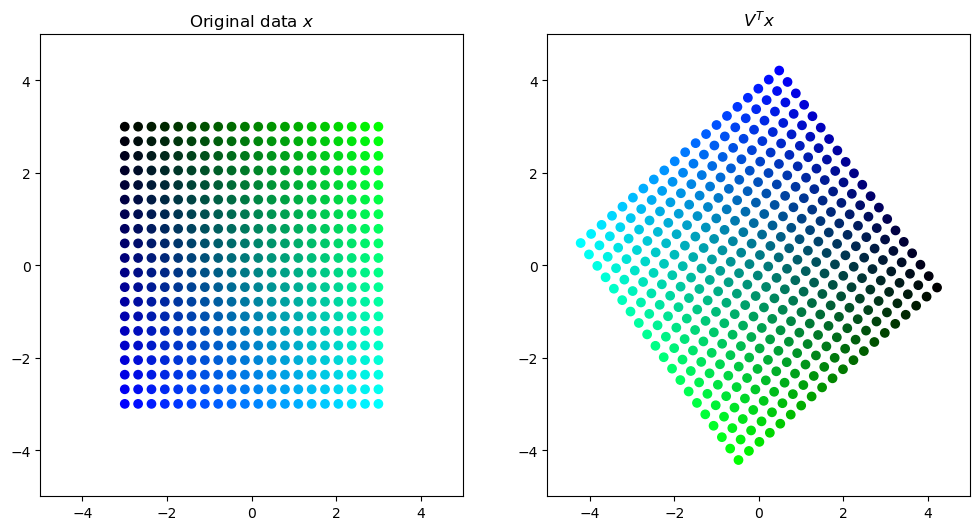

In [30]:
# Create a grid of coloured points in the x-y plane
data = np.linspace(-3,3,20)
original = np.vstack([[i,j] for i in data for j in data]).T
colours = np.vstack([[0,i,j] for i in np.linspace(0,1,20) for j in np.linspace(1,0,20)])

# Rotate the points using V^T
rotated = VT@original

# Plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(original[0], original[1], c=colours)
plt.title("Original data $x$")
plt.xlim([-5,5])
plt.ylim([-5,5])

plt.subplot(1,2,2)
plt.scatter(rotated[0],rotated[1], c=colours)
plt.title("$V^Tx$")
plt.xlim([-5,5])
plt.ylim([-5,5])

plt.show()

Next, we stretch with $\Sigma$ and rotate again with $U$. This final rotation is a 3D rotation so the final set of points is no longer in the $x-y$ plane.

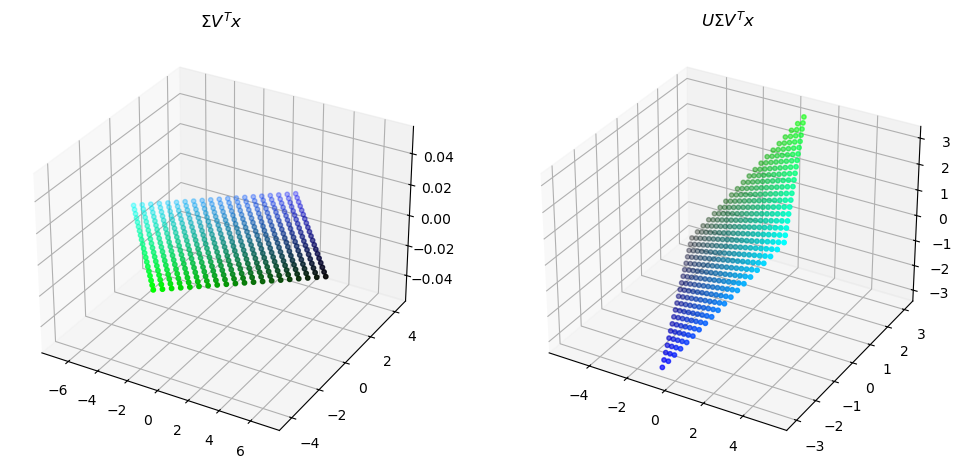

In [33]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1,projection='3d')
rotatedscaled3d = S @ rotated
ax.scatter(rotatedscaled3d[0],rotatedscaled3d[1],rotatedscaled3d[2], s=10,c=colors)
ax.set_title("$\\Sigma V^Tx$")

ax = plt.subplot(1,2,2,projection='3d')
final = U @ rotatedscaled3d
ax.scatter(final[0], final[1], final[2], s=10, c=colors)
ax.set_title("$U\\Sigma V^Tx$")

plt.show()

## Flags

One application of the idea of choosing the "best" low-rank approximation is in the area of **image compression**, where we would like to represent the matrix of pixels in an image in an efficient way.

For image compression, the use of the singular value decomposition will be particularly effective in images where there are a lot of horizontal and vertical lines. National flags make perfect examples as many of them can be represented by low-rank matrices. Before we start, consider each of the flags below. Can you put them in order of rank? Can you predict the rank for each of the low-rank cases? 

<div>
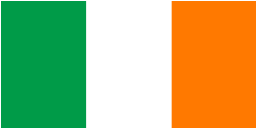
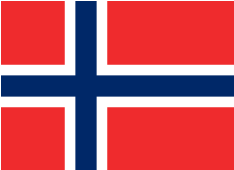
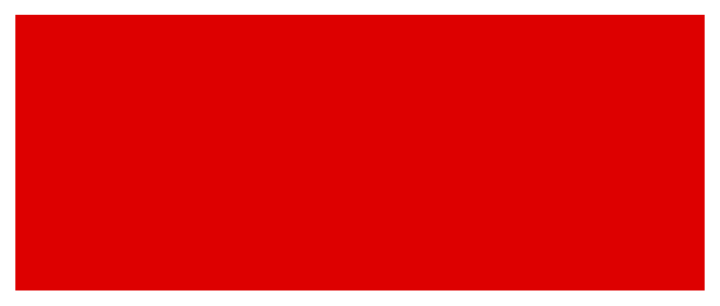
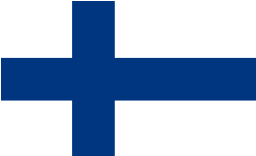
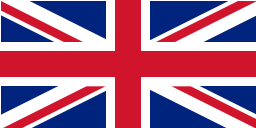
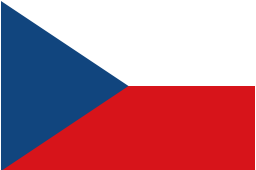
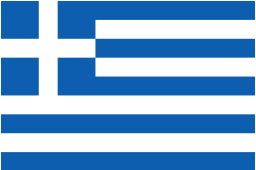
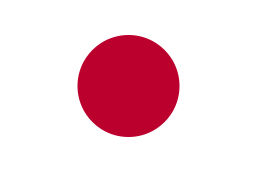
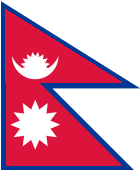
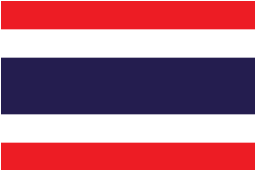
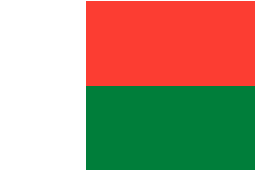
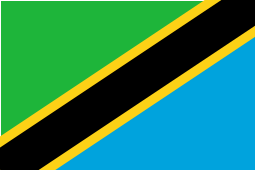
</div>

### Solution

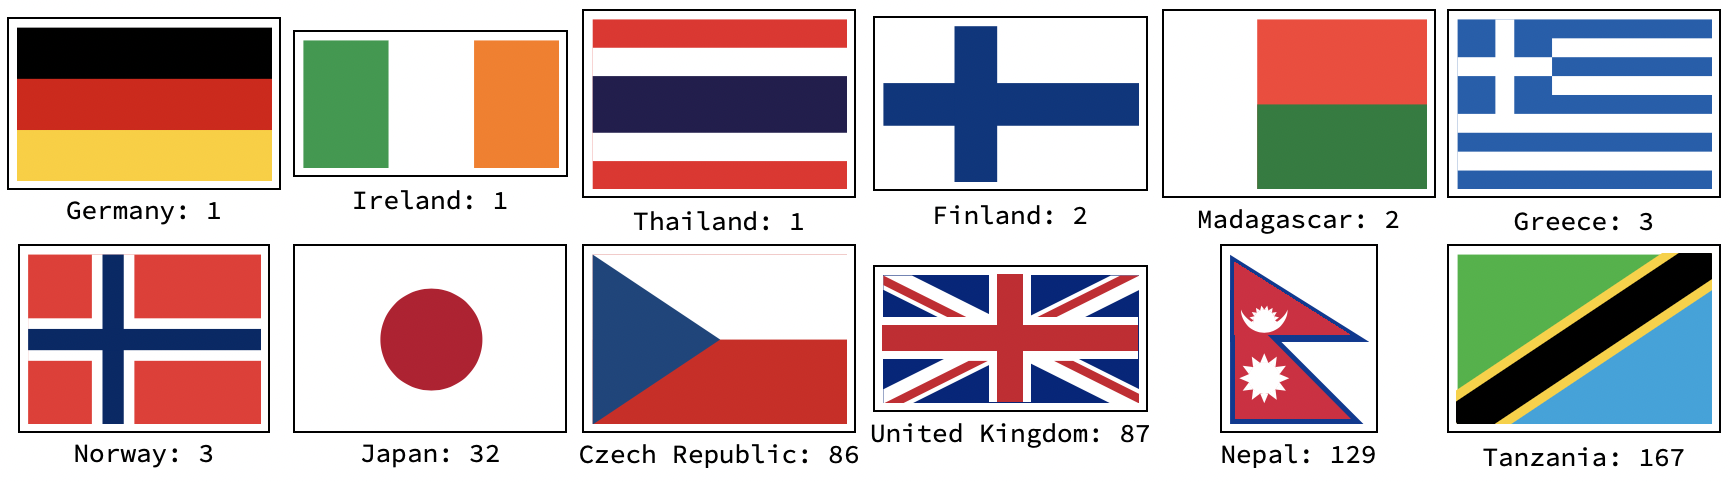

### Rank-1 flags

 Let's first look at one of the good cases: Ireland. We'll begin by loading the Irish flag:

(240, 120)


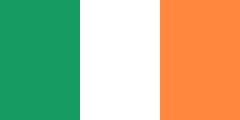

In [24]:
from PIL import Image

flag = Image.open('Ireland.png')
print(flag.size)
flag

This is an image built up out pixels represented by a matrix of size 120 x 240. Each entry in the matrix contains three numbers, one each representing how much of red, green and blue is present in that pixel. For simplicity, let's convert these three numbers to a single number by converting the colour image to grayscale.

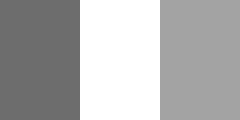

In [25]:
flagBW = flag.convert("L")
flagBW

Next we translate this image into 128 x 256 matrix of numbers in the range [0,1] where 0 represents black and 1 represents white.

In [27]:
flagMatrix = np.array(flagBW)/255 # Conversion to a greyscale, numpy array, with values 0-1.
print(np.shape(flagMatrix))
flagMatrix

(120, 240)


array([[0.42745098, 0.42745098, 0.42745098, ..., 0.63921569, 0.63921569,
        0.63921569],
       [0.42745098, 0.42745098, 0.42745098, ..., 0.63921569, 0.63921569,
        0.63921569],
       [0.42745098, 0.42745098, 0.42745098, ..., 0.63921569, 0.63921569,
        0.63921569],
       ...,
       [0.42745098, 0.42745098, 0.42745098, ..., 0.63921569, 0.63921569,
        0.63921569],
       [0.42745098, 0.42745098, 0.42745098, ..., 0.63921569, 0.63921569,
        0.63921569],
       [0.42745098, 0.42745098, 0.42745098, ..., 0.63921569, 0.63921569,
        0.63921569]])

Now that we have a matrix, compute its singular value decomposition:

In [29]:
U,Svec,VT = npl.svd(flagMatrix) 
S = np.zeros(flagMatrix.shape)
np.fill_diagonal(S,Svec)

We can reconstruct the original matrix and image from these:

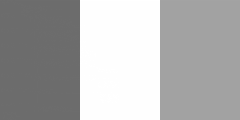

In [30]:
Image.fromarray((U@S@VT*255).astype('uint8'))

Let's look at the singular values, to see how many important singular vectors there are:

In [31]:
Svec

array([1.23598487e+02, 5.00919139e-14, 1.23499697e-14, 1.23499697e-14,
       1.23499697e-14, 1.23499697e-14, 1.23499697e-14, 1.23499697e-14,
       1.23499697e-14, 1.23499697e-14, 1.23499697e-14, 1.23499697e-14,
       1.23499697e-14, 1.23499697e-14, 1.23499697e-14, 1.23499697e-14,
       1.23499697e-14, 1.23499697e-14, 1.23499697e-14, 1.23499697e-14,
       1.23499697e-14, 1.23499697e-14, 1.23499697e-14, 1.23499697e-14,
       1.23499697e-14, 1.23499697e-14, 1.23499697e-14, 1.23499697e-14,
       1.23499697e-14, 1.23499697e-14, 1.23499697e-14, 1.23499697e-14,
       1.23499697e-14, 1.23499697e-14, 1.23499697e-14, 1.23499697e-14,
       1.23499697e-14, 1.23499697e-14, 1.23499697e-14, 1.23499697e-14,
       1.23499697e-14, 1.23499697e-14, 1.23499697e-14, 1.23499697e-14,
       1.23499697e-14, 1.23499697e-14, 1.23499697e-14, 1.23499697e-14,
       1.23499697e-14, 1.23499697e-14, 1.23499697e-14, 1.23499697e-14,
       1.23499697e-14, 1.23499697e-14, 1.23499697e-14, 1.23499697e-14,
      

This is a particularly nice matrix since it only has one singular value. It is therefore rank-1 and we have a very efficient low-rank approximation that is exact!

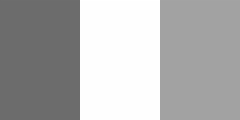

In [39]:
Image.fromarray((Svec[0]*np.outer(U[:,0],VT[0])*255).astype('uint8'))

This represents the flag by the first singular vector in U, which is just a vector with the same number 120 times. This tells us that the flag doesn't change along the vertical.

In [40]:
U[:,0]

array([-0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09128709,
       -0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09128709,
       -0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09128709,
       -0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09128709,
       -0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09128709,
       -0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09128709,
       -0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09128709,
       -0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09128709,
       -0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09128709,
       -0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09128709,
       -0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09128709,
       -0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09128709,
       -0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09128709,
       -0.09128709, -0.09128709, -0.09128709, -0.09128709, -0.09

The first singular vector in V is just a 240 element vector of three numbers, representing the darkness of each of the three bands that change along the horizontal.

In [41]:
VT[0]

array([-0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03788469,
       -0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03788469,
       -0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03788469,
       -0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03788469,
       -0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03788469,
       -0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03788469,
       -0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03788469,
       -0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03788469,
       -0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03788469,
       -0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03788469,
       -0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03788469,
       -0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03788469,
       -0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03788469,
       -0.03788469, -0.03788469, -0.03788469, -0.03788469, -0.03

### Higher rank flags

Other flags are less simple than the Irish flag. Let's try to figure out what rank the Greek flag is.

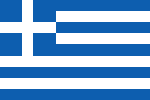

In [52]:
flag = Image.open('Greece.png')
flag

In [53]:
flagBW = flag.convert("L")
flagMatrix = np.array(flagBW)/255
U,Svec,VT = npl.svd(flagMatrix) 
S = np.zeros(flagMatrix.shape)
np.fill_diagonal(S,Svec)

It looks like there are only 3 singular values:

In [55]:
Svec

array([8.21643099e+01, 2.09848939e+01, 1.02709759e+01, 4.38780900e-14,
       1.88220312e-14, 7.58430260e-15, 7.58430260e-15, 7.58430260e-15,
       7.58430260e-15, 7.58430260e-15, 7.58430260e-15, 7.58430260e-15,
       7.58430260e-15, 7.58430260e-15, 7.58430260e-15, 7.58430260e-15,
       7.58430260e-15, 7.58430260e-15, 7.58430260e-15, 7.58430260e-15,
       7.58430260e-15, 7.58430260e-15, 7.58430260e-15, 7.58430260e-15,
       7.58430260e-15, 7.58430260e-15, 7.58430260e-15, 7.58430260e-15,
       7.58430260e-15, 7.58430260e-15, 7.58430260e-15, 7.58430260e-15,
       7.58430260e-15, 7.58430260e-15, 7.58430260e-15, 7.58430260e-15,
       7.58430260e-15, 7.58430260e-15, 7.58430260e-15, 7.58430260e-15,
       7.58430260e-15, 7.58430260e-15, 7.58430260e-15, 7.58430260e-15,
       7.58430260e-15, 7.58430260e-15, 7.58430260e-15, 7.58430260e-15,
       7.58430260e-15, 7.58430260e-15, 7.58430260e-15, 7.58430260e-15,
       7.58430260e-15, 7.58430260e-15, 7.58430260e-15, 7.58430260e-15,
      

Plot the singular values:

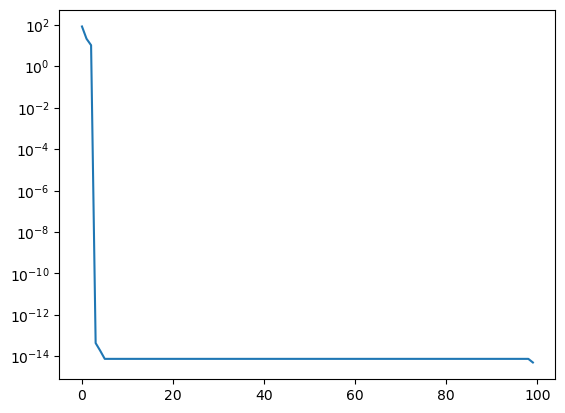

In [61]:
plt.figure()
plt.semilogy(Svec)
plt.show()

We can reconstruct the original matrix and image from these three:

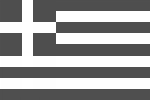

In [77]:
Image.fromarray(np.sum(255*[np.outer(Svec[i]*U[:,i],VT[i]) for i in range(0,3)], axis=0).astype('uint8'))

We can see how this is built up from the three rank-1 matrices:

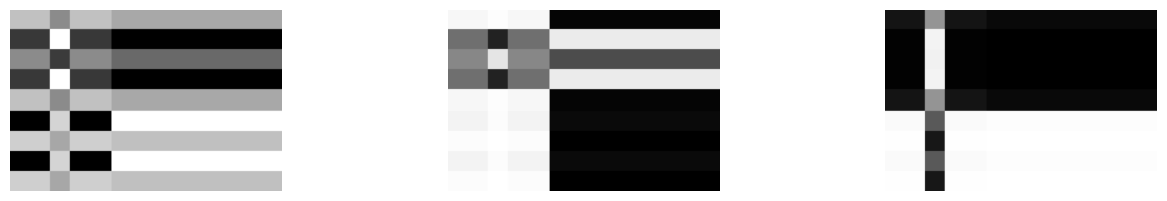

In [80]:
plt.figure(figsize=(16,8))
for k in range(0,3):
    plt.subplot(3,3,k+1)
    r1mat = S[k,k]*np.outer(U[:,k],VT[k,:])*255
    r1im = Image.fromarray(r1mat.astype('uint8'))
    plt.imshow(r1im, cmap="Greys")
    plt.axis('off')

### Medium rank flags

The Japanese flag is an example of a medium rank case. Let's compute its SVD.

(150, 100)


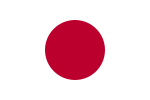

In [134]:
flag = Image.open('Japan.png')
print(flag.size)
flag

In [84]:
flagBW = flag.convert("L")
flagMatrix = np.array(flagBW)/255
U,Svec,VT = npl.svd(flagMatrix) 
S = np.zeros(flagMatrix.shape)
np.fill_diagonal(S,Svec)

There are only about 20-40 singular values:

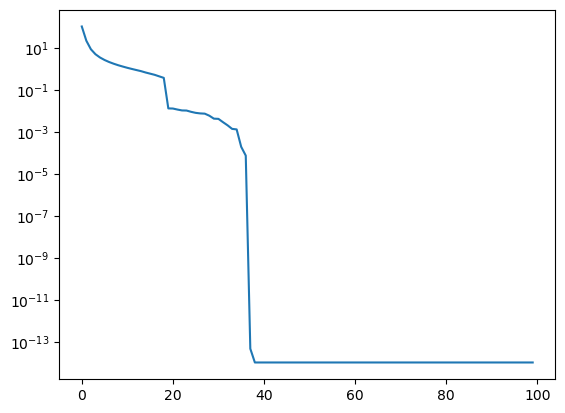

In [87]:
plt.figure()
plt.semilogy(Svec)
plt.show()

We can try to understand how the flag is built up by looking at its rank-1 pieces

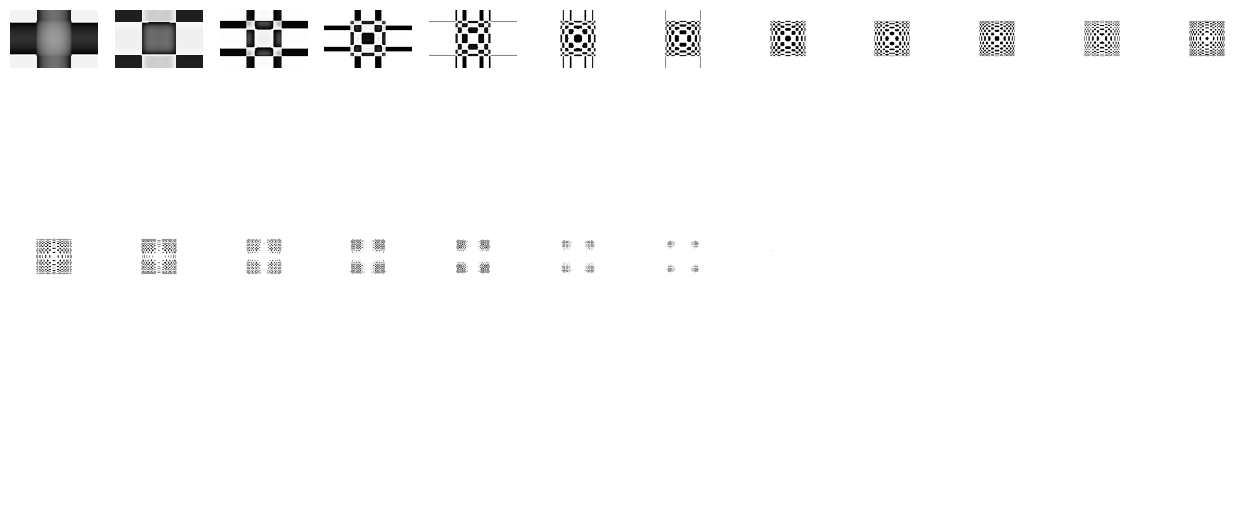

In [91]:
plt.figure(figsize=(16,8))
for k in range(0,36):
    plt.subplot(3,12,k+1)
    r1mat = S[k,k]*np.outer(U[:,k],VT[k,:])*255
    r1im = Image.fromarray(r1mat.astype('uint8'))
    plt.imshow(r1im, cmap="Greys")
    plt.axis('off')

Let's also look at what happens when adding up the first $k$ rank-1 contributions for different values of $k$

distance from original  0.030227708546126393


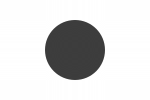

In [106]:
k=20
rkmat = (U[:,:k]@S[:k,:k]@VT[:k,:])
print("distance from original ",npl.norm(flagMatrix-rkmat))

rkmat = rkmat*255

rkim = Image.fromarray(rkmat.astype('uint8'))
rkim

### Full-rank flags

It doesn't take much of a change to turn a nice and simple low-rank flag into something full-rank. Take the Scottish flag, for example:

(300, 199)


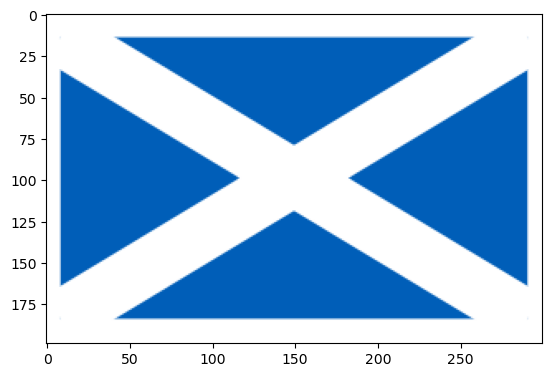

In [115]:
flag = Image.open('Scotland.png')
print(flag.size)
plt.imshow(flag)
plt.show()

This looks just as simple as the other flags, but from the point of view of the SVD those diagonal lines are a disaster.

In [116]:
flagBW = flag.convert("L")
flagMatrix = np.array(flagBW)/255
U,Svec,VT = npl.svd(flagMatrix) 
S = np.zeros(flagMatrix.shape)
np.fill_diagonal(S,Svec)

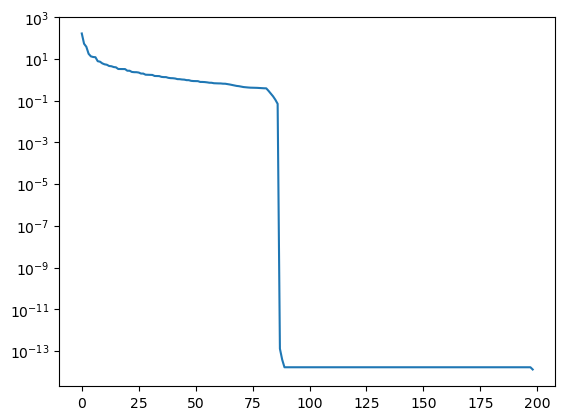

In [117]:
plt.figure()
plt.semilogy(Svec)
plt.show()

distance from original  7.267783053910579e-13


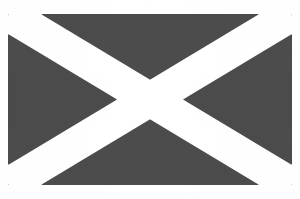

In [125]:
k=100
rkmat = (U[:,:k]@S[:k,:k]@VT[:k,:])
print("distance from original ",npl.norm(flagMatrix-rkmat))

rkmat = rkmat*255

rkim = Image.fromarray(rkmat.astype('uint8'))
rkim

Given that we know that this should be a simple one, is there something that we can do to make the SVD see it? How about if we rotate the image by \[Pi]/2 first to transform diagonal lines to horizontal and vertical, and then do the SVD on the rotated image? 

## Image Compression

Compression using singular values can also be achieve with more complicated images. Let's try it with a photo of UCD. First, we load the image and convert it to grayscale

(1180, 663)


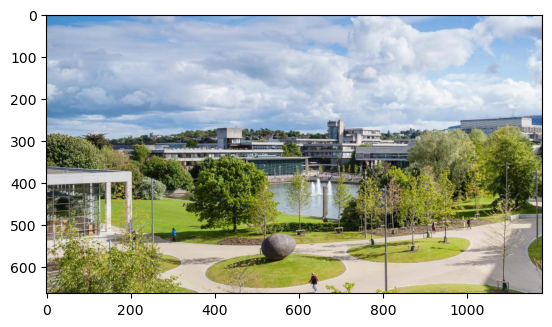

In [141]:
ucd = Image.open('UCD.jpg')
print(ucd.size)
plt.imshow(ucd)
plt.show()

In [142]:
ucdBW = ucd.convert("L")
ucdMatrix = np.array(ucdBW)/255
U,Svec,VT = npl.svd(ucdMatrix) 
S = np.zeros(ucdMatrix.shape)
np.fill_diagonal(S,Svec)

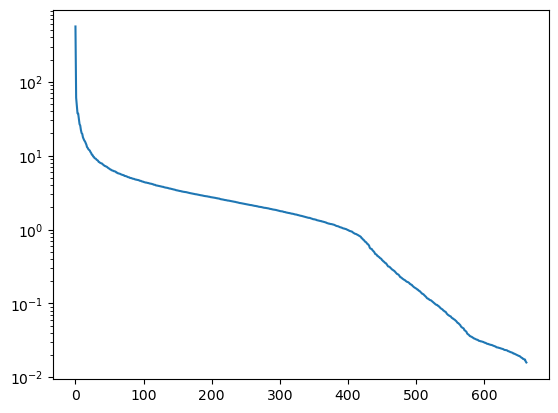

In [143]:
plt.figure()
plt.semilogy(Svec)
plt.show()

distance from original  44.16968907225568


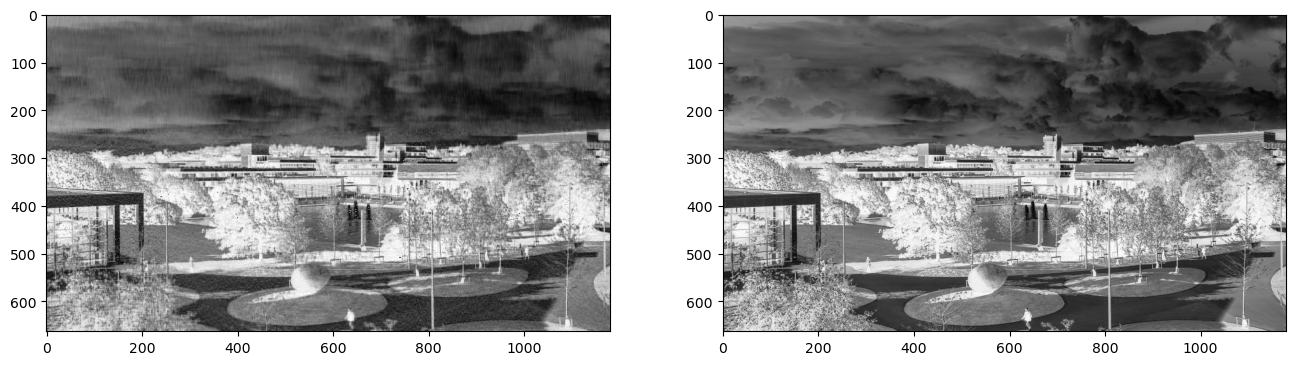

In [155]:
k=100
rkmat = (U[:,:k]@S[:k,:k]@VT[:k,:])
print("distance from original ",npl.norm(ucdMatrix-rkmat))

rkmat = rkmat*255

rkim = Image.fromarray(rkmat.astype('uint8'))

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(rkim, cmap="Greys")
plt.subplot(1,2,2)
plt.imshow(ucdBW, cmap="Greys")
plt.show()

## Singular value decomposition for approximating functions

The singular value decomposition does not only apply to linear algebra. We can also use it to get an approximation to an arbitrary function. For example, say we have a functional $m_n(x)$, which is parametrized by $n$, and for each $n$ we get a function of $x$. A simple example is $m_n(x)=sin(n x)$ with $0\le n\le 10$. In reality, this could be a much more complicated function that we would like to approximate in terms of simple functions. In our example, we wish to approximate it by a linear combination of $sin(n x)$ (i.e. basis functions) for specific values of $n$. The question then is how many specific values of n do we need in our basis so that we can  faithfully reproduce the function for all $n$? We can answer this question using the singular value decomposition. For this to work, it is important that the function has sufficiently many points in the $x$ direction such that it is resolved. The number of singular values gives the number of basis functions required. These will all be of the same order. Once enough basis functions are included, any further singular values should decrease exponentially in magnitude.

First we evaluate our function on a grid:

In [160]:
xs = np.linspace(0, 2*np.pi, 100)
ns = np.linspace(0, 10, 100)
sinnx = [[np.sin(n*x) for x in xs] for n in ns]

Now compute the singular value decomposition

In [163]:
U,Svec,VT = npl.svd(sinnx) 
S = np.zeros(ucdMatrix.shape)
np.fill_diagonal(S,Svec)

And plot the singular values

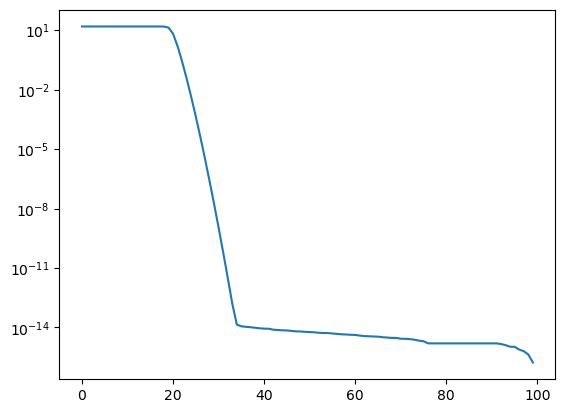

In [164]:
plt.figure()
plt.semilogy(Svec)
plt.show()

We see that in our $sin(n x)$ example, computing the singular values reveals that it is sufficient to have ~20 basis functions in order to reconstruct any value in the range $0<=n<=10$.